## INA219 - Measurement Check  
The INA219 is a current shunt and power monitor with programmable conversion times and filtering.  

Manufacturer link: http://www.ti.com/product/INA219  

Breakout board used: https://www.adafruit.com/product/904  

### Setup  
The INA219 was connected in between a variable output power source and a 220 ohm 1/4 watt resistor as a load (R_load).  Between the source and load a Watt's Up power meter was connected to confirm circuit behavior.  

Watt's Up meter:  https://www.rc-electronics-usa.com/watt-meter/watts-up-meter.html  

<img src="../docs/images/INA219_test_setup.jpg">  

Note the ground connection between the power supply and the I2C bus.  Without this, readings will drift.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from meerkat.ina219 import INA219
from meerkat import parser

In [2]:
# bus number 1 on Raspberry Pi
dev = INA219(bus_n=1, bus_addr=0x40, output='csv')

In [3]:
dev.verbose = True

#### Configuration

In [4]:
# reset all configuration settings
dev.reset()

Writing to 'config' registry # 0
HEX value: 0xb99f
Binary value:
1011100110011111
1111110000000000
5432109876543210


Example only uses "Simple Current Shunt Monitor Usage" (see section 8.5.3 in datasheet) defaults:  
* 12-bit resolution  
* 320 mV shunt full scale range (PGA = /8)  
* 32 V bus full scale range  
* Continuous conversion of shunt and bus voltage

In [5]:
cal = dev.get_config()

Bus Voltage Range: 32 V
PGA Range: 8x or +/- 320 mV
Configuration Register:
HEX value: 0x399f
Binary value:
0011100110011111
1111110000000000
5432109876543210


#### CSV Writer Output

In [6]:
# switch back to CSV format
dev.writer_output = 'csv'

In [7]:
dev.write(description='2.0_0.01_0.0_0.0', n=5)

In [8]:
dev.write(description='3.0_0.01_0.0_0.0', n=5)

In [9]:
dev.write(description='4.0_0.03_0.00_0.00', n=5)

In [10]:
dev.write(description='5.0_0.03_4.99_0.01', n=5)

In [11]:
dev.write(description='6.0_0.03_6.00_0.01', n=5)

In [12]:
dev.write(description='7.0_0.03_7.00_0.02', n=5)

In [13]:
dev.write(description='8.0_0.04_8.02_0.02', n=5)

In [14]:
dev.write(description='9.0_0.04_8.98_0.03', n=5)

In [15]:
dev.write(description='10.0_0.05_9.94_0.03', n=5)

In [16]:
dev.write(description='11.0_0.05_10.96_0.04', n=5)

In [17]:
dev.write(description='12.0_0.06_11.90_0.04', n=5)

In [18]:
dev.write(description='13.0_0.06_12.92_0.05', n=5)

In [19]:
dev.write(description='14.0_0.07_13.91_0.05', n=5)

In [20]:
dev.write(description='15.0_0.07_14.86_0.06', n=5)

In [21]:
dev.write(description='16.0_0.08_15.85_0.07', n=5)

In [22]:
dev.write(description='17.0_0.08_16.87_0.07', n=5)

In [23]:
dev.write(description='18.0_0.09_17.83_0.08', n=5)

In [24]:
dev.csv_writer.path

'2020_01_27_22_22_11_data.csv'

In [25]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

In [26]:
# Pandas 0.24.1 hack
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')

In [27]:
df_check = df.description.str.split("_", expand=True)
df_check.columns = ["supply_v","supply_a", "meter_v", "meter_a"]
df_check = df_check.astype(float)

In [28]:
df = pd.concat([df, df_check], axis=1)

In [29]:
df.dtypes

std_time_ms                   object
description                   object
sample_n                       int64
voltage                      float64
current                      float64
datetime64_ns    datetime64[ns, UTC]
supply_v                     float64
supply_a                     float64
meter_v                      float64
meter_a                      float64
dtype: object

### Plot Results

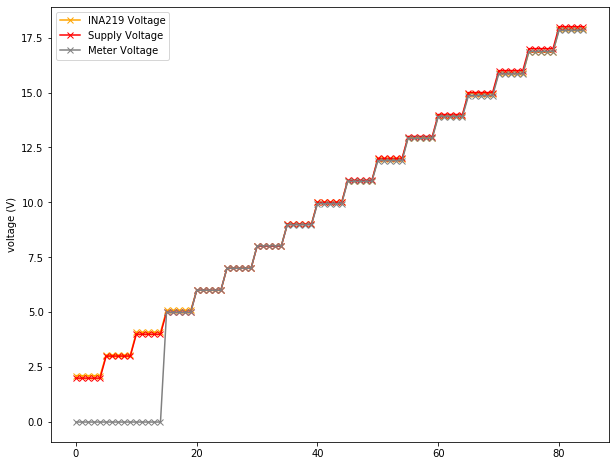

In [30]:
fig0, ax0 = plt.subplots()
fig0.set_size_inches(10, 8)

ax0.plot(df.index, df.voltage,  label="INA219 Voltage", color="orange", marker="x")
ax0.plot(df.index, df.supply_v, label="Supply Voltage", color="red",    marker="x")
ax0.plot(df.index, df.meter_v,  label="Meter Voltage",  color="grey",   marker="x")

ax0.set_ylabel("voltage (V)")
ax0.legend()
plt.show()

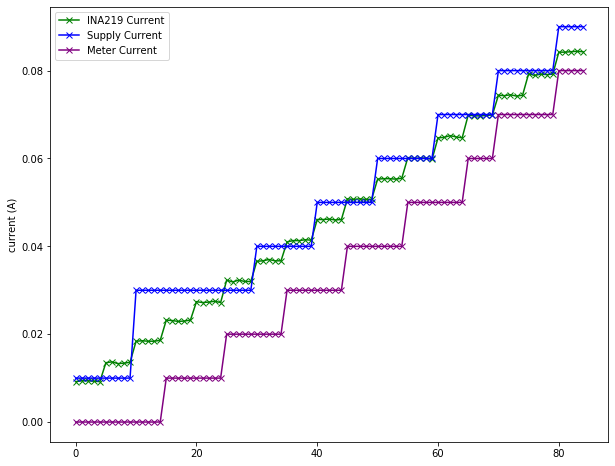

In [32]:
fig0, ax1 = plt.subplots()
fig0.set_size_inches(10, 8)

ax1.plot(df.index, df.current,  label="INA219 Current", color="green",  marker="x")
ax1.plot(df.index, df.supply_a, label="Supply Current", color="blue", marker="x")
ax1.plot(df.index, df.meter_a,  label="Meter Current",  color="purple", marker="x")

ax1.set_ylabel("current (A)")

ax1.legend()
plt.show()